# k-Nearest Neighbours  

## Objective:  
-  Using knn algorithm classify a dataset

## About the dataset:  
Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

In [1]:
#Import necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Load the data set and review few samples
df = pd.read_csv('teleCust1000t.csv')
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


-  Thus we see that the data is classified in the column 'custcat' into four classes.  
kNN works by calculating the distance of the k-nearest neighbours from the test sample and classify based on majority.

In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

-  Looking into the classification we observe that the sample is equivalently distributed across all classes.  
Thus diminishing the effect of bias to a particular class.

In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [29]:
#Separating the features from classifiers into X and Y matrix
X = df.iloc[:,:-1].values #All rows of all columns except last column
Y = df.iloc[:,-1].values #All rows of last column
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

## Normalize data  
Data Standardization give data zero mean and unit variance. This is a good practice for algorithms such as kNN which are based on distance of of cases.

In [31]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [36]:
#Creating a training and testing set out of the existing dataset
from sklearn.model_selection import train_test_split
[X_train, X_test, Y_train, Y_test] = train_test_split(X, Y, test_size=0.2, random_state=4)

print('Train set : ' , X_train.shape , Y_train.shape)
print('Test set : ' , X_test.shape , Y_test.shape)

Train set :  (800, 11) (800,)
Test set :  (200, 11) (200,)


## kNN model  
Let us start with k=4 for now

In [37]:
from sklearn.neighbors import KNeighborsClassifier
k=4
#Training the data
neighbour = KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)
neighbour


KNeighborsClassifier(n_neighbors=4)

In [38]:
#Predicting the outcomes on test data
h_theta = neighbour.predict(X_test)
h_theta

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 2, 1, 3, 1, 3, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 2, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 1, 4, 2, 1,
       2, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 4, 1, 1, 4, 2, 3, 3, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
       3, 3], dtype=int64)

In [43]:
#calculating accuracy
#In multilabel classification, accuracy classification score is a function that computes subset accuracy. 
#This function is equal to the jaccard_similarity_score function. 
#Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

from sklearn import metrics
print('Training Set Accuracy: ', metrics.accuracy_score(Y_train, neighbour.predict(X_train)))
print('Test Set Accuracy: ', metrics.accuracy_score(Y_test, h_theta))

Training Set Accuracy:  0.5475
Test Set Accuracy:  0.32


Now we calculate accuracy for different k vaules and plot the variation.  
This gives us a perspective of which k to select for our model to give higher accuracy results

In [48]:
Ks = 10
mean_acc = np.zeros(Ks-1)
std_acc = np.zeros(Ks-1)

for i in range(1,Ks):
    neighbour = KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
    h_theta = neighbour.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(Y_test, h_theta)
    std_acc[i-1] = np.std(Y_test == h_theta)/np.sqrt(h_theta.shape[0])
    
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

mean_acc thus gives the jaccard_similarity_score for each iteration.  
std_acc stores the result of standard deviation of simiilarity of predictions and actual values of test set.

We plot mean_acc against Ks and find the best k values suited for our model.


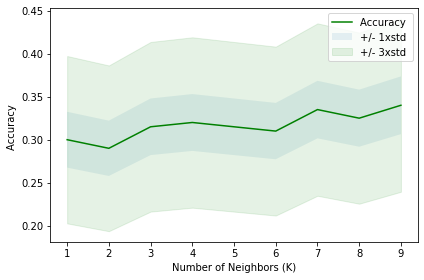

In [56]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc + 1*std_acc, mean_acc - 1*std_acc, alpha=0.1)
plt.fill_between(range(1,Ks), mean_acc + 3*std_acc, mean_acc - 3*std_acc, alpha=0.1, color='green')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Thus it can be seen that best accuracy is 0.34 with k=9